We have provided you with a dataset and the complete code for Decision Trees, the first cell will download the dataset and set everything up for you. The objectives for you to complete are as follows:


*   Download the dataset and do the necessary preprocessing
*   Run the algorithm



In [1]:
!wget -O datasets/tutorial6_train.csv "https://drive.google.com/file/d/1anmPpc7Ox5yeEY4AWFAoBRkBKUfIaJth/view?usp=drive_link"
# export=csv
!wget -O datasets/tutorial6_test.csv "https://drive.google.com/file/d/1YAdIEx_ea_3Ka91qlUYG3RdzlUaZcZgx/view?usp=drive_link"

--2024-09-23 15:08:26--  https://drive.google.com/file/d/1anmPpc7Ox5yeEY4AWFAoBRkBKUfIaJth/view?usp=drive_link
Resolving drive.google.com (drive.google.com)... 142.250.66.14, 2404:6800:4009:830::200e
Connecting to drive.google.com (drive.google.com)|142.250.66.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets/tutorial6_train.csv’

datasets/tutorial6_     [  <=>               ]  87.24K   349KB/s    in 0.3s    

2024-09-23 15:08:27 (349 KB/s) - ‘datasets/tutorial6_train.csv’ saved [89330]

--2024-09-23 15:08:28--  https://drive.google.com/file/d/1YAdIEx_ea_3Ka91qlUYG3RdzlUaZcZgx/view?usp=drive_link
Resolving drive.google.com (drive.google.com)... 142.250.66.14, 2404:6800:4009:830::200e
Connecting to drive.google.com (drive.google.com)|142.250.66.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets/tutorial6_test.csv’

datasets/tutorial6_     [ <=>  

The above link contains files in following order.


1.   train.csv
2.   test.csv



### Preprocessing

In [13]:
# TODO : load the dataset, and do necessary preprocessing steps
#        The dataset already contains the train.csv file use that for training
import pandas as pd

file_path = 'datasets/tutorial6_train.csv'
dataset1 = pd.read_csv(file_path)

file_path2 = 'datasets/tutorial6_test.csv'
dataset2 = pd.read_csv(file_path2)

dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Correlation Matrix:
PassengerId: {'PassengerId': 0.9988776655443321, 'Survived': -0.005001041619179756, 'Pclass': -0.03510455071496958, 'Age': 0.037048042505848255, 'SibSp': -0.05746226943675994, 'Parch': -0.0016501582922780708, 'Fare': 0.012644012531837523}
Survived: {'PassengerId': -0.005001041619179756, 'Survived': 0.9988776655443281, 'Pclass': -0.3381011470317646, 'Age': -0.07788430661609243, 'SibSp': -0.03528285522817589, 'Parch': 0.08153779158731703, 'Fare': 0.25701773840922115}
Pclass: {'PassengerId': -0.03510455071496958, 'Survived': -0.3381011470317646, 'Pclass': 0.9988776655443267, 'Age': -0.369669668066816, 'SibSp': 0.08298811776954129, 'Parch': 0.018421972465281714, 'Fare': -0.5488828975870669}
Age: {'PassengerId': 0.037048042505848255, 'Survived': -0.07788430661609243, 'Pclass': -0.369669668066816, 'Age': 0.9985994397759101, 'SibSp': -0.2595357391939277, 'Parch': -0.1999205989419561, 'Fare': 0.10215890791713499}
SibSp: {'PassengerId': -0.05746226943675994, 'Survived': -0.0

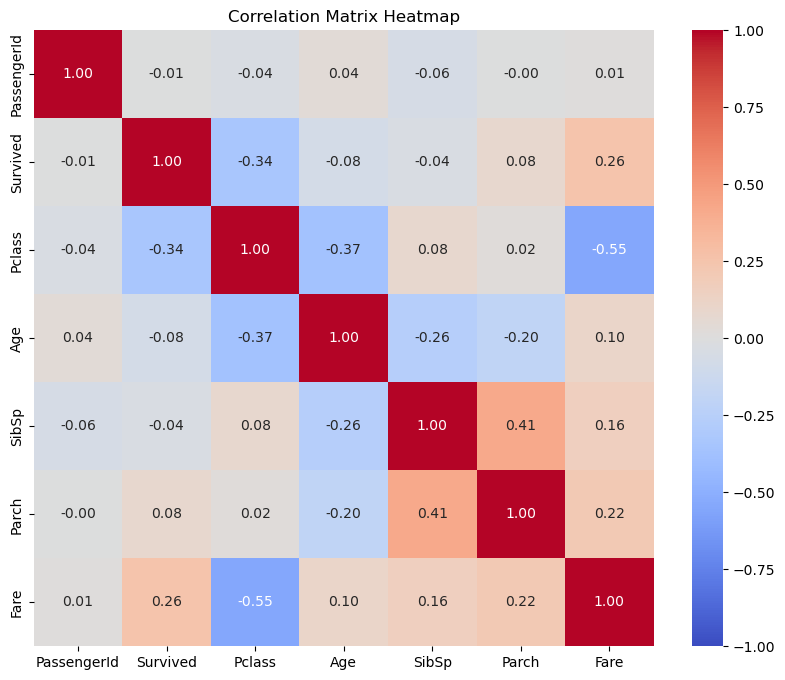

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation
class CusDataFrame:
    def __init__(self, file_path = None, data = None):
        # Load data from file or use passed data
        if file_path is not None:
            self.df = pd.read_csv(file_path)
        else:
            self.df = data

    def calculate_correlation_matrix(self):
        # Get numerical columns
        df = self.df
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)

        # Create an empty correlation matrix
        corr_matrix = {}
        for row in numerical_columns:
            corr_matrix[row] = {}
            for col in numerical_columns:
                corr_matrix[row][col] = 0

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                # Calculate mean
                mean1 = df[col1].mean()
                mean2 = df[col2].mean()

                # Calculate covariance
                covariance = ((df[col1] - mean1) * (df[col2] - mean2)).mean()

                # Calculate standard deviations
                std_dev1 = df[col1].std()
                std_dev2 = df[col2].std()

                # Calculate correlation
                correlation = covariance / (std_dev1 * std_dev2)

                # Store in matrix
                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation  # Symmetric matrix

        return corr_matrix

    def display_correlation_matrix(self):
        corr_matrix = self.calculate_correlation_matrix()
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")
        # print(len(corr_matrix))
        # print(len(corr_matrix[0]))
        data_frame = pd.DataFrame(corr_matrix) 
        plt.figure(figsize=(10,8))
        sns.heatmap(data_frame, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title('Correlation Matrix Heatmap')
        plt.show()

df = CusDataFrame(file_path = file_path)
df.display_correlation_matrix()

In [15]:
def count_na_values(df):
    na_counts = {col: 0 for col in df.columns}

    # Iterate through each row and column
    for index, row in df.iterrows():
        for col in df.columns:
            # Check for NA values
            if pd.isna(row[col]):
                na_counts[col] += 1

    print("Columns with NA values:")
    for column, count in na_counts.items():
        print(f"{column}: {count}")

# numerical_columns = df.select_dtypes(include=['float64', 'int64']) 
df = pd.read_csv(file_path)
count_na_values(df)
print("")
df2 = pd.read_csv(file_path2)
count_na_values(df2)

Columns with NA values:
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2

Columns with NA values:
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [16]:
dataset1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
df_copy = df.copy()
df2_copy = df2.copy()
df_copy.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
df2_copy.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

def fill_missing_with_mean(data, numerical_columns):
    for column in numerical_columns:
        total_sum = 0
        count = 0
        for value in data[column]:
            if not pd.isna(value):  # Check for missing values
                total_sum += value
                count += 1
        mean_value = total_sum / count

        # Replace missing values with the calculated mean
        for i in range(len(data[column])):
            if pd.isna(data[column][i]):
                data[column][i] = mean_value

def most_frequent_value_for_column(data, column):
    frequency = {}
    for value in data[column]:
        if not pd.isna(value):
            frequency[value] = frequency.get(value, 0) + 1
    most_frequent = max(frequency, key=frequency.get) if frequency else None
    return most_frequent

def replace_missing_values_in_columns(data, column):
    for col in column:
        most_frequent = most_frequent_value_for_column(data, col)
        for i in range(len(data[col])):
            if pd.isna(data[col][i]):
                data[col][i] = most_frequent
                    
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns
fill_missing_with_mean(df_copy, numerical_columns)
categorical_columns = df_copy.select_dtypes(include=['object']).columns
replace_missing_values_in_columns(df_copy, categorical_columns)

numerical_columns2 = df2_copy.select_dtypes(include=['float64', 'int64']).columns
fill_missing_with_mean(df2_copy, numerical_columns2)
categorical_columns2 = df2_copy.select_dtypes(include=['object']).columns
replace_missing_values_in_columns(df2_copy, categorical_columns2)
print(df_copy)
print("")
print(df2_copy)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]

     Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0         3    male  34.50000      0

/tmp/ipykernel_8836/4148028655.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[column][i] = mean_value
/tmp/ipykernel_8836/4148028655.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [18]:
count_na_values(df_copy)
print("")
count_na_values(df2_copy)

Columns with NA values:
Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0

Columns with NA values:
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


In [19]:
# one hot encoding
def one_hot_encode(df, columns):
  """
  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to one-hot encode.

  Returns:
    The DataFrame with the one-hot encoded columns.
  """
  for column_name in columns:
      unique_values = df[column_name].unique()
      for value in unique_values:
        df[column_name + "(" + str(value) + ")"] = (df[column_name] == value).astype(int)
      df = df.drop(column_name, axis=1)
  return df

df_encoded = one_hot_encode(df_copy.copy(), categorical_columns)
print(df_encoded.head())

df_encoded2 = one_hot_encode(df2_copy.copy(), categorical_columns2)
print(df_encoded2.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex(male)  Sex(female)  \
0         0       3  22.0      1      0   7.2500          1            0   
1         1       1  38.0      1      0  71.2833          0            1   
2         1       3  26.0      0      0   7.9250          0            1   
3         1       1  35.0      1      0  53.1000          0            1   
4         0       3  35.0      0      0   8.0500          1            0   

   Embarked(S)  Embarked(C)  Embarked(Q)  
0            1            0            0  
1            0            1            0  
2            1            0            0  
3            1            0            0  
4            1            0            0  
   Pclass   Age  SibSp  Parch     Fare  Sex(male)  Sex(female)  Embarked(Q)  \
0       3  34.5      0      0   7.8292          1            0            1   
1       3  47.0      1      0   7.0000          0            1            0   
2       2  62.0      0      0   9.6875          

In [20]:
# df_encoded = CusDataFrame(data = df_encoded)
# df_encoded.display_correlation_matrix()
df_normalized = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())
df_normalized2 = (df_encoded2 - df_encoded2.min()) / (df_encoded2.max() - df_encoded2.min())
print(df_normalized)
print("")
print(df_normalized2)

     Survived  Pclass       Age  SibSp     Parch      Fare  Sex(male)  \
0         0.0     1.0  0.271174  0.125  0.000000  0.014151        1.0   
1         1.0     0.0  0.472229  0.125  0.000000  0.139136        0.0   
2         1.0     1.0  0.321438  0.000  0.000000  0.015469        0.0   
3         1.0     0.0  0.434531  0.125  0.000000  0.103644        0.0   
4         0.0     1.0  0.434531  0.000  0.000000  0.015713        1.0   
..        ...     ...       ...    ...       ...       ...        ...   
886       0.0     0.5  0.334004  0.000  0.000000  0.025374        1.0   
887       1.0     0.0  0.233476  0.000  0.000000  0.058556        0.0   
888       0.0     1.0  0.367921  0.125  0.333333  0.045771        0.0   
889       1.0     0.0  0.321438  0.000  0.000000  0.058556        1.0   
890       0.0     1.0  0.396833  0.000  0.000000  0.015127        1.0   

     Sex(female)  Embarked(S)  Embarked(C)  Embarked(Q)  
0            0.0          1.0          0.0          0.0  
1      

In [21]:
# Move column 'Survived' to the end
b = df_normalized.pop('Survived')
df_preprocessed = df_normalized.assign(Survived=b)
df_preprocessed2 = df_normalized2
# c = df_normalized2.pop('Survived')
# df_preprocessed2 = df_normalized2.assign(Survived=c)
print(df_preprocessed)
# print(df_preprocessed2)

     Pclass       Age  SibSp     Parch      Fare  Sex(male)  Sex(female)  \
0       1.0  0.271174  0.125  0.000000  0.014151        1.0          0.0   
1       0.0  0.472229  0.125  0.000000  0.139136        0.0          1.0   
2       1.0  0.321438  0.000  0.000000  0.015469        0.0          1.0   
3       0.0  0.434531  0.125  0.000000  0.103644        0.0          1.0   
4       1.0  0.434531  0.000  0.000000  0.015713        1.0          0.0   
..      ...       ...    ...       ...       ...        ...          ...   
886     0.5  0.334004  0.000  0.000000  0.025374        1.0          0.0   
887     0.0  0.233476  0.000  0.000000  0.058556        0.0          1.0   
888     1.0  0.367921  0.125  0.333333  0.045771        0.0          1.0   
889     0.0  0.321438  0.000  0.000000  0.058556        1.0          0.0   
890     1.0  0.396833  0.000  0.000000  0.015127        1.0          0.0   

     Embarked(S)  Embarked(C)  Embarked(Q)  Survived  
0            1.0          0.0   

In [32]:
df_preprocessed2.dtypes

Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Sex(male)      float64
Sex(female)    float64
Embarked(Q)    float64
Embarked(S)    float64
Embarked(C)    float64
dtype: object

In [22]:
X_train = df_preprocessed.iloc[:, :-1]  # All columns except the last one
Y_train = df_preprocessed.iloc[:, -1]    # Last column only
Y_train_reshaped = Y_train.values.reshape(-1, 1)

No changes required here!

In [23]:
import numpy as np
import pandas as pd

In [24]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [25]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
    
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Train the algorithm

In [26]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train_reshaped)
classifier.print_tree()

X_5 <= 0.0 ? 0.1396479574728524
 left:X_0 <= 0.5 ? 0.0992456441378125
  left:X_1 <= 0.01985423473234481 ? 0.0047586093260834905
    left:0.0
    right:X_4 <= 0.05604306762136532 ? 0.004039209008153216
        left:1.0
        right:1.0
  right:X_4 <= 0.04538097769949478 ? 0.06980056980056987
    left:X_1 <= 0.4470972606182458 ? 0.02541731772500999
        left:1.0
        right:0.0
    right:X_3 <= 0.0 ? 0.060778727445394254
        left:1.0
        right:0.0
 right:X_1 <= 0.0701181201306861 ? 0.01981221304625158
  left:X_2 <= 0.25 ? 0.37037037037037035
    left:1.0
    right:X_1 <= 0.01985423473234481 ? 0.030864197530864196
        left:0.0
        right:0.0
  right:X_0 <= 0.0 ? 0.02004289592513342
    left:X_4 <= 0.050748620223090936 ? 0.02334595959595953
        left:0.0
        right:0.0
    right:X_4 <= 0.09154270340242172 ? 0.002978951743586422
        left:0.0
        right:0.0


In [33]:
# Test your model
predictions = classifier.predict(df_preprocessed2.values)
predictions

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0